In [1]:
# in the name of god 

In [3]:
import pandas as pd 
import numpy as np
from IPython.display import clear_output
import time
import pickle

import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
# Display figures inline in Jupyter notebook
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 5)})

In [4]:
#prepare Dataset gyroscope
dfg16=pd.read_csv('16\\giroscopio_terra.csv')
dfg17=pd.read_csv('17\\giroscopio_terra.csv')
dfg20=pd.read_csv('20\\giroscopio_terra.csv')
dfg21=pd.read_csv('21\\giroscopio_terra.csv')

dfg16['ts']=pd.to_datetime(dfg16.apply(lambda x:(round((x.uptimeNanos-dfg16.uptimeNanos[0])/1000000)*1000000),axis=1))
dfg17['ts']=pd.to_datetime(dfg17.apply(lambda x:(round((x.uptimeNanos-dfg17.uptimeNanos[0])/1000000)*1000000),axis=1))
dfg20['ts']=pd.to_datetime(dfg20.apply(lambda x:(round((x.uptimeNanos-dfg20.uptimeNanos[0])/1000000)*1000000),axis=1))
dfg21['ts']=pd.to_datetime(dfg21.apply(lambda x:(round((x.uptimeNanos-dfg21.uptimeNanos[0])/1000000)*1000000),axis=1))

dm16=dfg16['ts']
dm17=dfg17['ts']
dm20=dfg20['ts']
dm21=dfg21['ts']

dfg16=dfg16.drop('uptimeNanos',1).drop('timestamp',1)
dfg17=dfg17.drop('uptimeNanos',1).drop('timestamp',1)
dfg20=dfg20.drop('uptimeNanos',1).drop('timestamp',1)
dfg21=dfg21.drop('uptimeNanos',1).drop('timestamp',1)

dfg16=dfg16.set_index('ts').rename(columns={'x': 'g-x','y': 'g-y','z': 'g-z'})
dfg17=dfg17.set_index('ts').rename(columns={'x': 'g-x','y': 'g-y','z': 'g-z'})
dfg20=dfg20.set_index('ts').rename(columns={'x': 'g-x','y': 'g-y','z': 'g-z'})
dfg21=dfg21.set_index('ts').rename(columns={'x': 'g-x','y': 'g-y','z': 'g-z'})


In [5]:
#prepare Dataset accelarator
dfa16=pd.read_csv('16\\acelerometro_terra.csv')
dfa17=pd.read_csv('17\\acelerometro_terra.csv')
dfa20=pd.read_csv('20\\acelerometro_terra.csv')
dfa21=pd.read_csv('21\\acelerometro_terra.csv')

dfa16['ts']=dm16
dfa17['ts']=dm17
dfa20['ts']=dm20
dfa21['ts']=dm21

dfa16=dfa16.drop('uptimeNanos',1).drop('timestamp',1)
dfa17=dfa17.drop('uptimeNanos',1).drop('timestamp',1)
dfa20=dfa20.drop('uptimeNanos',1).drop('timestamp',1)
dfa21=dfa21.drop('uptimeNanos',1).drop('timestamp',1)

dfa16=dfa16.set_index('ts').rename(columns={'x': 'a-x','y': 'a-y','z': 'a-z'})
dfa17=dfa17.set_index('ts').rename(columns={'x': 'a-x','y': 'a-y','z': 'a-z'})
dfa20=dfa20.set_index('ts').rename(columns={'x': 'a-x','y': 'a-y','z': 'a-z'})
dfa21=dfa21.set_index('ts').rename(columns={'x': 'a-x','y': 'a-y','z': 'a-z'})


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017EF09C96C8>,
      dtype=object)

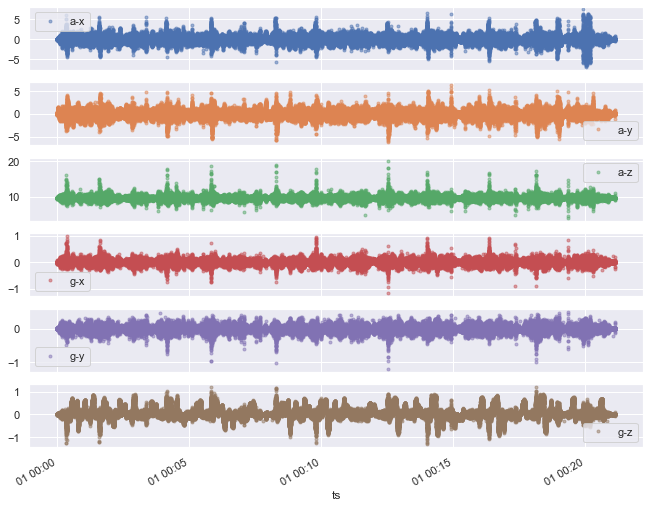

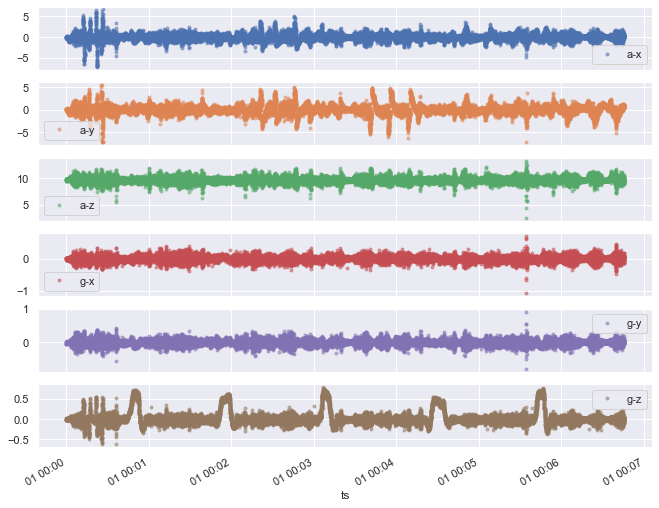

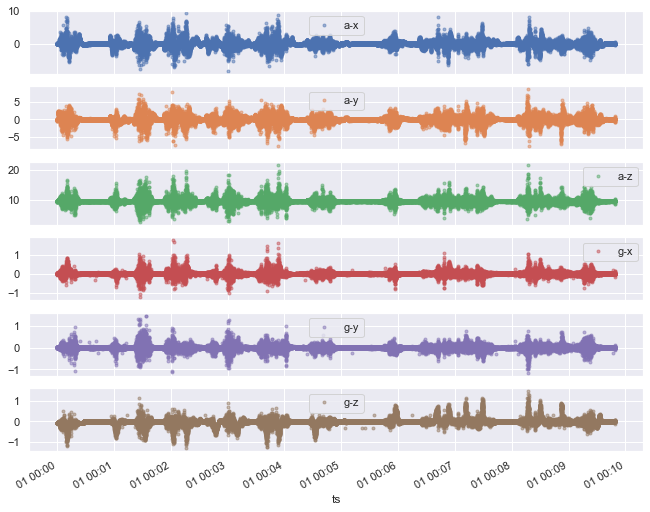

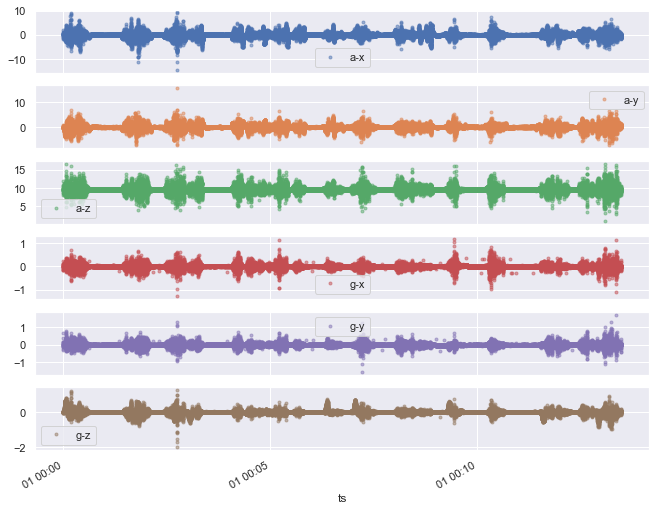

In [6]:
df1 = pd.concat([dfa16, dfg16], axis=1, join='outer')
df2 = pd.concat([dfa17, dfg17], axis=1, join='outer')
df3 = pd.concat([dfa20, dfg20], axis=1, join='outer')
df4 = pd.concat([dfa21, dfg21], axis=1, join='outer')

df1.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
df2.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
df3.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
df4.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)


In [7]:
#change index
delata_time1=df1.index[-1]-df1.index[0]
delata_time2=df2.index[-1]-df2.index[0]
delata_time3=df3.index[-1]-df3.index[0]

new_df2_index=df2.index+delata_time1
new_df3_index=df3.index+delata_time1+delata_time2
new_df4_index=df4.index+delata_time1+delata_time2+delata_time3

df2=df2.set_index(new_df2_index)
df3=df3.set_index(new_df3_index)
df4=df4.set_index(new_df4_index)

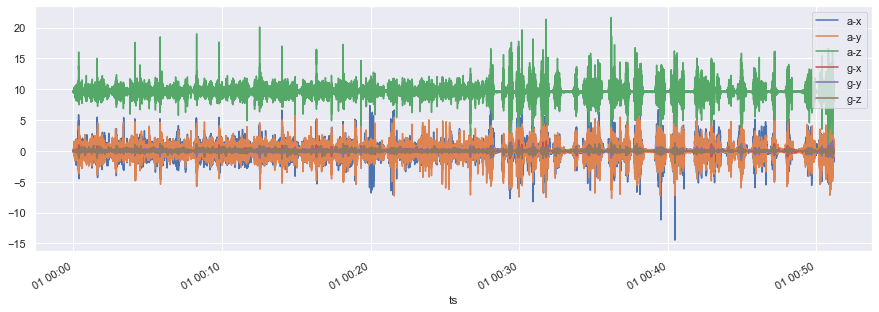

In [8]:
df=pd.concat([df1,df2,df3,df4])
df.plot()

In [9]:
#prepare Labeled dataset
dfl1=pd.read_csv('16\\groundTruth.csv')
dfl2=pd.read_csv('17\\groundTruth.csv')
dfl3=pd.read_csv('20\\groundTruth.csv')
dfl4=pd.read_csv('21\\groundTruth.csv')


#extract the labels for clutering precision its for after clustering
def time_convertor(x):
    s,h,m=0,0,0
    s=round(x%60,2)
    m=int(x/60)
    h=int(m/60)
    m=m%60
    time=str(h)+':'+str(m)+':'+str(s)
    return pd.to_datetime('1970-01-01 '+time)

dfl1['st_time']=dfl1.apply(lambda x:time_convertor(x.st) ,axis=1 )
dfl1['en_time']=dfl1.apply(lambda x:time_convertor(x.en) ,axis=1 )

dfl2['st_time']=dfl2.apply(lambda x:time_convertor(x.st) ,axis=1 )+delata_time1
dfl2['en_time']=dfl2.apply(lambda x:time_convertor(x.en) ,axis=1 )+delata_time1

dfl3['st_time']=dfl3.apply(lambda x:time_convertor(x.st) ,axis=1 )+delata_time1+delata_time2
dfl3['en_time']=dfl3.apply(lambda x:time_convertor(x.en) ,axis=1 )+delata_time1+delata_time2

dfl4['st_time']=dfl4.apply(lambda x:time_convertor(x.st) ,axis=1 )+delata_time1+delata_time2+delata_time3
dfl4['en_time']=dfl4.apply(lambda x:time_convertor(x.en) ,axis=1 )+delata_time1+delata_time2+delata_time3

dfl=pd.concat([dfl1,dfl2,dfl3,dfl4])

dfl['length']=dfl.en-dfl.st
lmean=dfl.length.mean()
lstd=dfl.length.std()

dfl=dfl.drop('st',1).drop('en',1).drop('length',1)

evented_label=list()
for i in range(len(dfl)):
    evented_label.append((dfl.iloc[i][0],dfl.iloc[i][1],dfl.iloc[i][2]))

In [9]:
#Dont RUN this part
#we should optimize M
#lengh of random event
from random import gauss
L=round(gauss(lmean,lstd)*50)
M=round(gauss(0.5,1)*50)

temp_event=list()
pointer=0
stop=False
#go on timeserise for event extraction
while stop!=True:
    clear_output(wait=True)
    M=round(gauss(1,0.5)*50)
    pointer=pointer + M
    #go forward till reach M
    L=round(gauss(lmean,lstd)*50)
    l_min=pointer-int(L/2)
    l_max=pointer+int(L/2)
    if (l_min<0):
        l_min=0
    if (l_max>len(df)):
        l_max=len(df)
        stop=True

    print('extraction ',l_max/len(df),' %  is complete')
    
    temp_event.append(df[l_min:l_max])



extraction  1.0  %  is complete


In [10]:
#Dont RUN this part
#calculate distance
from fastdtw import fastdtw
distance=list()
n=0
k=(len(temp_event))
k=k*k
t1=time.time()
for i,x in enumerate(temp_event):
    dumy=list()
    for j,y in enumerate(temp_event):
        clear_output(wait=True)
        n=n+1
        print('disstance calculatoin ',round((n/k)*100,4),' %  is complete')
        if (i<=j):
            continue
        else:
            dist,_=fastdtw(x,y)
            dumy.append(dist)
        
    distance.append(dumy)
t2=time.time()

print(round((t2-t1)/60) ,'min has time for calculaton distant')

disstance calculatoin  100.0  %  is complete
3674 min has time for calculaton distant


In [11]:
#Dont RUN this part
#clustering precision
n=0
k=len(temp_event)*len(evented_label)
labels_distance=list()

for tag,st,en in evented_label:
    dummy=list()
    for t_e in temp_event:
        clear_output(wait=True)
        n=n+1
        print('disstance calculatoin ',round((n/k)*100,2),' %  is complete')
        dist,_=fastdtw(df[st:en],t_e)
        dummy.append(dist)
    labels_distance.append((tag,dummy))


disstance calculatoin  100.0  %  is complete


In [12]:
#Save temp_event
with open("temp_event_ALL.txt", "wb") as fp:
    pickle.dump(temp_event, fp)
    
#Save distance matrix
with open("distance_ALL.txt", "wb") as fp:
    pickle.dump(distance, fp)
    
#Save labeds distance matrix
with open("labels_distance_ALL.txt", "wb") as fp:
    pickle.dump(labels_distance, fp)
    

In [10]:
#load File , save the time of calculation
with open("temp_event_ALL.txt", "rb") as fp:
    te = pickle.load(fp)
with open("distance_ALL.txt", "rb") as fp:
    dc = pickle.load(fp)
with open("labels_distance_ALL.txt", "rb") as fp:
    ld = pickle.load(fp)

In [11]:
#make it as matrix 
#full it with zero for squaring
from copy import deepcopy
def creat_Symmetric_matrix(file):  
    MTX=deepcopy(file)
    for i in range(len(MTX)):
        while len(MTX[i])!=len(MTX):
            MTX[i].append(0)
    #make it Symmetry from diameter
    arr=np.array(MTX)
    dis=np.array(MTX)
    for i in range(len(arr)):
        for j in range(len(arr)):
            if (i>j):
                dis[j][i]=arr[i][j]
    return dis
dis=creat_Symmetric_matrix(dc)

No handles with labels found to put in legend.


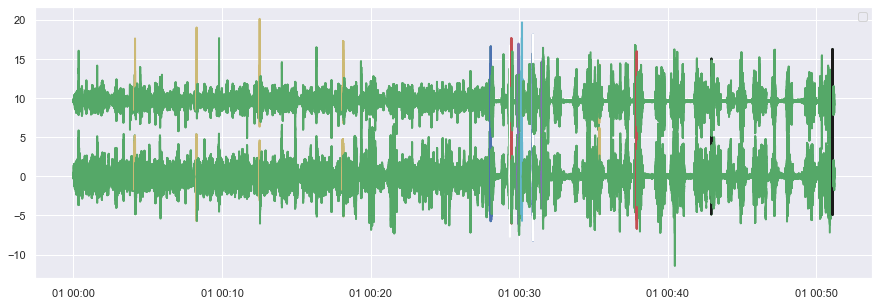

In [12]:
#initial clustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=60, affinity='precomputed', linkage = 'average').fit(dis)

plot_list=list()
for i,el in enumerate(te):
    plot_list.append((el,cluster.labels_[i]))
    
fig, ax = plt.subplots()

for el in plot_list:
    if el[1]==0:
        ax.plot(el[0], linestyle='-', linewidth=2,c='g')
    elif el[1]==1:
        ax.plot(el[0], linestyle='-', linewidth=2,c='b')
    elif el[1]==2:
        ax.plot(el[0], linestyle='-', linewidth=2,c='r')
    elif el[1]==3:
        ax.plot(el[0], linestyle='-', linewidth=2,c='c')
    elif el[1]==4:
        ax.plot(el[0], linestyle='-', linewidth=2,c='m')
    elif el[1]==5:
        ax.plot(el[0], linestyle='-', linewidth=2,c='y')
    elif el[1]==6:
        ax.plot(el[0], linestyle='-', linewidth=2,c='k')
    elif el[1]==7:
        ax.plot(el[0], linestyle='-', linewidth=2,c='b')
    elif el[1]==8:
        ax.plot(el[0], linestyle='-', linewidth=2,c='r')
    elif el[1]==9:
        ax.plot(el[0], linestyle='-', linewidth=2,c='w')

ax.legend();
plt.show() 

In [25]:
#calculate the precision of clustering by labeled data 
exploratory_analysis=list()
for el in ld:
    midle_list=list()
    label_tag =el[0]
    label_distance=el[1].copy()
    label_distance.append(0)
    distance_matrix=dc.copy()
    distance_matrix.append(label_distance)
    DMX=creat_Symmetric_matrix(distance_matrix)
    Labels = AgglomerativeClustering(n_clusters=32, affinity='precomputed', linkage = 'average').fit(DMX).labels_
    
    #extract lable  and labele it from the item we put at the end
    for i , x in enumerate(Labels):
        if i!=(len(Labels)-1):
            if x==Labels[-1]:
                midle_list.append(i)
    exploratory_analysis.append([label_tag,midle_list])


In [26]:
actg=dict()
for ev,x in exploratory_analysis:
    if ev in actg:
        actg[ev].append(x)
    else:
        actg.update({ev:[x]})

In [27]:
#calculate the Probibility of being event of temp_event
Prob_threshold=0.3
precision=list()

for event_name in actg:
    flat_list=list(dict.fromkeys(flatten(actg[event_name])))
    dprecision=list()
    for S in flat_list:
        x=0
        Number=len(actg[event_name])
        for i in range(Number):
            if S in actg[event_name][i]:
                x=x+1
        Probability=x/Number
        if Probability > Prob_threshold:
            dprecision.append((S,Probability))
    precision.append((event_name,dprecision))


as you can see its the Selected event and their Probability

In [28]:
precision[1]

('curva_direita_agressiva',
 [(23, 0.5454545454545454),
  (24, 0.5454545454545454),
  (97, 0.5454545454545454),
  (98, 0.5454545454545454),
  (578, 0.5454545454545454),
  (832, 0.5454545454545454),
  (833, 0.5454545454545454),
  (975, 0.5454545454545454),
  (1731, 0.5454545454545454),
  (1732, 0.5454545454545454),
  (2514, 0.5454545454545454),
  (2515, 0.5454545454545454),
  (2569, 0.5454545454545454),
  (2603, 0.5454545454545454),
  (2639, 0.5454545454545454)])

as you can see its the Selected event and their Probability

In [29]:
precision[2]

('curva_esquerda_agressiva',
 [(245, 0.36363636363636365),
  (484, 0.36363636363636365),
  (485, 0.36363636363636365),
  (742, 0.36363636363636365),
  (1086, 0.36363636363636365),
  (1087, 0.36363636363636365),
  (1088, 0.36363636363636365),
  (1089, 0.36363636363636365),
  (1090, 0.36363636363636365),
  (2172, 0.36363636363636365),
  (2173, 0.36363636363636365),
  (2136, 0.36363636363636365),
  (2137, 0.36363636363636365),
  (2138, 0.36363636363636365),
  (2231, 0.36363636363636365),
  (2232, 0.36363636363636365)])

but in the others event we have nothing to say because its too much data and it seems somethings goes wrong

maybe if we increase Data , and done this algorithm again could be conclude something


In [30]:
precision[3]

('troca_faixa_direita_agressiva',
 [(0, 1.0),
  (1, 1.0),
  (2, 1.0),
  (3, 1.0),
  (4, 1.0),
  (5, 1.0),
  (6, 1.0),
  (7, 1.0),
  (8, 1.0),
  (9, 1.0),
  (10, 1.0),
  (11, 1.0),
  (12, 1.0),
  (13, 1.0),
  (14, 1.0),
  (15, 1.0),
  (16, 1.0),
  (17, 1.0),
  (18, 1.0),
  (19, 1.0),
  (20, 1.0),
  (21, 1.0),
  (22, 1.0),
  (25, 1.0),
  (26, 1.0),
  (27, 1.0),
  (28, 1.0),
  (29, 1.0),
  (30, 1.0),
  (31, 1.0),
  (32, 1.0),
  (33, 1.0),
  (34, 1.0),
  (35, 1.0),
  (36, 1.0),
  (37, 1.0),
  (38, 1.0),
  (39, 1.0),
  (40, 1.0),
  (41, 1.0),
  (42, 1.0),
  (43, 1.0),
  (44, 1.0),
  (45, 1.0),
  (46, 1.0),
  (47, 1.0),
  (48, 1.0),
  (49, 1.0),
  (50, 1.0),
  (51, 1.0),
  (52, 1.0),
  (53, 1.0),
  (54, 1.0),
  (55, 1.0),
  (56, 1.0),
  (57, 1.0),
  (58, 1.0),
  (59, 1.0),
  (60, 1.0),
  (61, 1.0),
  (62, 1.0),
  (63, 1.0),
  (64, 1.0),
  (65, 1.0),
  (66, 1.0),
  (67, 1.0),
  (68, 1.0),
  (69, 1.0),
  (70, 1.0),
  (71, 1.0),
  (72, 1.0),
  (73, 1.0),
  (74, 1.0),
  (75, 1.0),
  (76, 1.0),
 